In [53]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we create

In [54]:
#Read the data
NBA = pd.read_csv(r"C:\Users\jlaks\Downloads\nba.csv")

In [55]:
NBA

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,6-2,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,6-6,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,6-5,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,6-5,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,6-10,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,6-10,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,6-3,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,6-1,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,7-3,256,NaN,2900000.0


In [56]:
NBA.shape

(457, 9)

In [57]:
NBA.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [58]:
#Total NA values in the Dataset

NBA.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [61]:
#Change the column name Number to Chest_Number to be more specific

NBA.rename(columns = {"Number" : "Chest_number"},inplace = True)
NBA

,Name,Team,Chest_number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,6-2,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,6-6,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,6-5,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,6-5,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,6-10,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,6-10,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,6-3,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,6-1,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,7-3,256,NaN,2900000.0


In [62]:
#Duplicates Treatment

NBA.drop_duplicates(subset = "Name", keep = 'first').count()

Name            457
Team            457
Chest_number    457
Position        457
Age             457
Height          457
Weight          457
College         373
Salary          446
dtype: int64

In [63]:
#Filling the NaN values with the Mean of that column

Salary_Mean = NBA["Salary"].mean()
NBA["Salary"].fillna(Salary_Mean)
NBA["Salary"].mean()

4842684.105381166

In [64]:
#Filling the NaN values with the Median of that column

Salary_median = NBA["Salary"].median()
NBA["Salary"].fillna(Salary_median,inplace = True)
NBA["Salary"].mean()

4794457.142231948

In [65]:
#drop the rows if all the values in that row are NA

NBA.dropna(axis = 0, how = "all")

,Name,Team,Chest_number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,6-2,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,6-6,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,6-5,205,Boston University,2839073.0
3,R.J. Hunter,Boston Celtics,28,SG,22,6-5,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,6-10,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,6-10,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,6-3,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,6-1,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,7-3,256,NaN,2900000.0


In [66]:
NBA.dtypes

Name             object
Team             object
Chest_number      int64
Position         object
Age               int64
Height           object
Weight            int64
College          object
Salary          float64
dtype: object

In [67]:
# change the salary data type to int
NBA["Salary"] = nba["Salary"].astype('int64')

In [68]:
NBA.dtypes

Name            object
Team            object
Chest_number     int64
Position        object
Age              int64
Height          object
Weight           int64
College         object
Salary           int64
dtype: object

In [69]:
NBA.fillna('unknown')

,Name,Team,Chest_number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,6-2,180,Texas,7730337
1,Jae Crowder,Boston Celtics,99,SF,25,6-6,235,Marquette,6796117
2,John Holland,Boston Celtics,30,SG,27,6-5,205,Boston University,2839073
3,R.J. Hunter,Boston Celtics,28,SG,22,6-5,185,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8,PF,29,6-10,231,unknown,5000000
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,6-10,234,Kentucky,2239800
453,Shelvin Mack,Utah Jazz,8,PG,26,6-3,203,Butler,2433333
454,Raul Neto,Utah Jazz,25,PG,24,6-1,179,unknown,900000
455,Tibor Pleiss,Utah Jazz,21,C,26,7-3,256,unknown,2900000


In [71]:
NBA["Salary"].max()

25000000

In [72]:
NBA_sort = NBA.sort_values(by = ['Salary'], inplace = False, ascending = False)
NBA_sort

,Name,Team,Chest_number,Position,Age,Height,Weight,College,Salary
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,6-6,212,NaN,25000000
169,LeBron James,Cleveland Cavaliers,23,SF,31,6-8,250,NaN,22970500
33,Carmelo Anthony,New York Knicks,7,SF,32,6-8,240,Syracuse,22875000
251,Dwight Howard,Houston Rockets,12,C,30,6-11,265,NaN,22359364
339,Chris Bosh,Miami Heat,1,PF,32,6-11,235,Georgia Tech,22192730
...,...,...,...,...,...,...,...,...,...
175,Jordan McRae,Cleveland Cavaliers,12,SG,25,6-5,179,Tennessee,111196
135,Alan Williams,Phoenix Suns,15,C,23,6-8,260,UC Santa Barbara,83397
130,Phil Pressey,Phoenix Suns,25,PG,25,5-11,175,Missouri,55722
291,Orlando Johnson,New Orleans Pelicans,0,SG,27,6-5,220,UC Santa Barbara,55722


In [73]:
NBA.groupby(by="Team").sum().loc[:,"Salary"]

Team
Atlanta Hawks              72902950
Boston Celtics             61380141
Brooklyn Nets              52528475
Charlotte Hornets          78340920
Chicago Bulls              86783378
Cleveland Cavaliers       109827762
Dallas Mavericks           71198732
Denver Nuggets             62961003
Detroit Pistons            67168263
Golden State Warriors      88868997
Houston Rockets            75283021
Indiana Pacers             66751826
Los Angeles Clippers       94854640
Los Angeles Lakers         71770431
Memphis Grizzlies          87907172
Miami Heat                 88193819
Milwaukee Bucks            69603517
Minnesota Timberwolves     62548770
New Orleans Pelicans       82750774
New York Knicks            73303898
Oklahoma City Thunder      93765298
Orlando Magic              60161470
Philadelphia 76ers         33831967
Phoenix Suns               63445135
Portland Trail Blazers     48301818
Sacramento Kings           71683666
San Antonio Spurs          84442733
Toronto Raptors        

In [74]:
NBA.groupby(by = 'Team').count()

,Name,Chest_number,Position,Age,Height,Weight,College,Salary
Team,,,,,,,,
Atlanta Hawks,15,15,15,15,15,15,11,15
Boston Celtics,15,15,15,15,15,15,13,15
Brooklyn Nets,15,15,15,15,15,15,13,15
Charlotte Hornets,15,15,15,15,15,15,13,15
Chicago Bulls,15,15,15,15,15,15,12,15
Cleveland Cavaliers,15,15,15,15,15,15,12,15
Dallas Mavericks,15,15,15,15,15,15,12,15
Denver Nuggets,15,15,15,15,15,15,9,15
Detroit Pistons,15,15,15,15,15,15,15,15


In [75]:
# Correlation
NBA.corr(method = 'pearson')

,Chest_number,Age,Weight,Salary
Chest_number,1.000000,0.028724,0.206921,-0.111161
Age,0.028724,1.000000,0.087183,0.208582
Weight,0.206921,0.087183,1.000000,0.138621
Salary,-0.111161,0.208582,0.138621,1.000000


Text(86.09375, 0.5, 'Team Attributes')

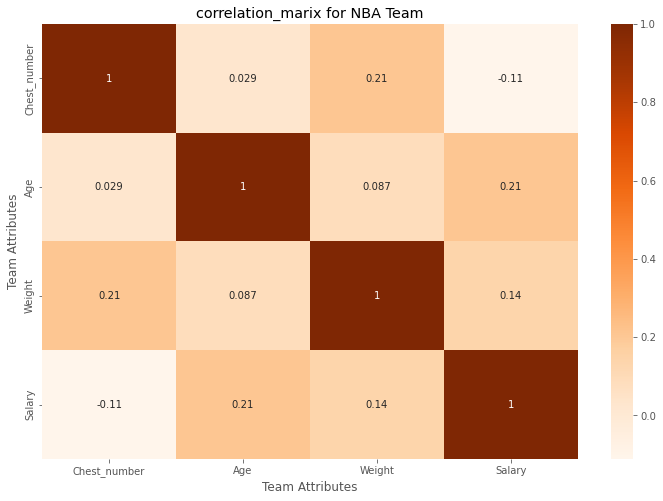

In [87]:
#visualising the correaltion 

correlation_matrix = NBA.corr(method = 'pearson')
sns.heatmap(correlation_matrix, cmap="Oranges",annot = True)
plt.title('correlation_marix for NBA Team') 
plt.xlabel('Team Attributes')
plt.ylabel('Team Attributes')

In [92]:
NBA_numerized = NBA.copy()

for col_name in NBA_numerized.columns:
    if(NBA_numerized[col_name].dtype == 'object'):
        NBA_numerized[col_name] = NBA_numerized[col_name].astype('category')
        NBA_numerized[col_name] = NBA_numerized[col_name].cat.codes

NBA_numerized.head() 


,Name,Team,Chest_number,Position,Age,Height,Weight,College,Salary
0,34,1,0,2,25,6,180,93,7730337
1,171,1,99,3,25,10,235,52,6796117
2,211,1,30,4,27,9,205,8,2839073
3,355,1,28,4,22,9,185,33,1148640
4,216,1,8,1,29,4,231,-1,5000000


Text(86.09375, 0.5, 'Team Attributes')

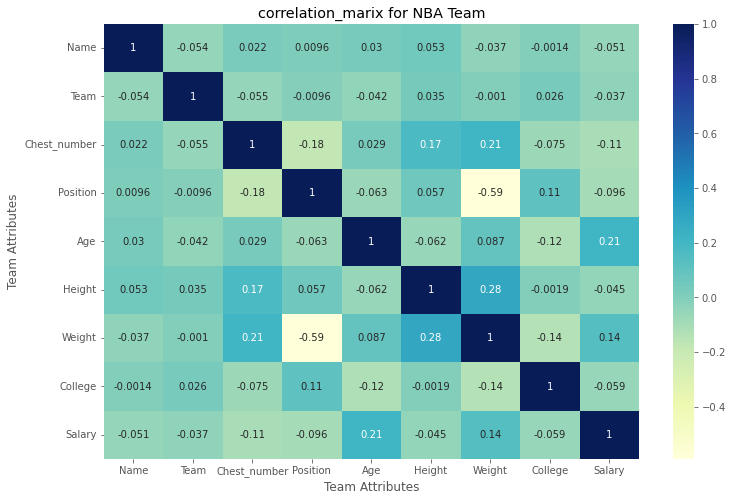

In [94]:

correlation_matrix = NBA_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, cmap="YlGnBu",annot = True)
plt.title('correlation_marix for NBA Team') 
plt.xlabel('Team Attributes')
plt.ylabel('Team Attributes')

In [100]:
corr_matr = NBA_numerized.corr()
corr_pairs = corr_matr.unstack()
corr_pairs

Name    Name            1.000000
        Team           -0.054396
        Chest_number    0.021735
        Position        0.009619
        Age             0.030005
                          ...   
Salary  Age             0.208582
        Height         -0.045136
        Weight          0.138621
        College        -0.058513
        Salary          1.000000
Length: 81, dtype: float64

In [ ]:
#From the heatmap we can say that the Age and Weight are positively correlated to the Salary attribute
#The weight and the position the player play are Negetively correlated
#The Chest_Number also has impact in accordance to the weight and height of the player therefore improving the performance
